<a href="https://colab.research.google.com/github/hasnainroopawalla/Doodle-Classifier/blob/master/Doodle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download the classes.txt file containing names of all 345 classes

In [0]:
!wget 'https://raw.githubusercontent.com/zaidalyafeai/zaidalyafeai.github.io/master/sketcher/mini_classes.txt'

--2020-01-13 13:37:47--  https://raw.githubusercontent.com/zaidalyafeai/zaidalyafeai.github.io/master/sketcher/mini_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 760 [text/plain]
Saving to: ‘mini_classes.txt’

mini_classes.txt    100%[===================>]     760  --.-KB/s    in 0s      

2020-01-13 13:37:48 (172 MB/s) - ‘mini_classes.txt’ saved [760/760]



In [0]:
f = open("mini_classes.txt","r")
# And for reading use

classes = f.readlines()
f.close()
classes = [c.replace('\n','').replace(' ','_') for c in classes]
print(classes)

['drums', 'sun', 'laptop', 'anvil', 'baseball_bat', 'ladder', 'eyeglasses', 'grapes', 'book', 'dumbbell', 'traffic_light', 'wristwatch', 'wheel', 'shovel', 'bread', 'table', 'tennis_racquet', 'cloud', 'chair', 'headphones', 'face', 'eye', 'airplane', 'snake', 'lollipop', 'power_outlet', 'pants', 'mushroom', 'star', 'sword', 'clock', 'hot_dog', 'syringe', 'stop_sign', 'mountain', 'smiley_face', 'apple', 'bed', 'shorts', 'broom', 'diving_board', 'flower', 'spider', 'cell_phone', 'car', 'camera', 'tree', 'square', 'moon', 'radio', 'hat', 'pizza', 'axe', 'door', 'tent', 'umbrella', 'line', 'cup', 'fan', 'triangle', 'basketball', 'pillow', 'scissors', 't-shirt', 'tooth', 'alarm_clock', 'paper_clip', 'spoon', 'microphone', 'candle', 'pencil', 'envelope', 'saw', 'frying_pan', 'screwdriver', 'helmet', 'bridge', 'light_bulb', 'ceiling_fan', 'key', 'donut', 'bird', 'circle', 'beard', 'coffee_cup', 'butterfly', 'bench', 'rifle', 'cat', 'sock', 'ice_cream', 'moustache', 'suitcase', 'hammer', 'rain

In [0]:
!mkdir data

In [0]:
import urllib.request
base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
for c in classes:
  print(c)
  cls_url = c.replace('_', '%20')
  path = base+cls_url+'.npy'
  print(path)
  urllib.request.urlretrieve(path, 'data/'+c+'.npy')

drums
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/drums.npy
sun
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/sun.npy
laptop
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/laptop.npy
anvil
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/anvil.npy
baseball_bat
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/baseball%20bat.npy
ladder
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ladder.npy
eyeglasses
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/eyeglasses.npy
grapes
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/grapes.npy
book
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/book.npy
dumbbell
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/dumbbell.npy
traffic_light
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/traffic%20light.npy
wristwatch
https://storage.googleapis

In [0]:
import os
import glob
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf

In [0]:
def load_data(root, vfold_ratio=0.2, max_items_per_class= 4000 ):
    all_files = glob.glob(os.path.join(root, '*.npy'))

    #initialize variables 
    x = np.empty([0, 784])
    y = np.empty([0])
    class_names = []

    #load each data file 
    for idx, file in enumerate(all_files):
        data = np.load(file)
        data = data[0: max_items_per_class, :]
        labels = np.full(data.shape[0], idx)

        x = np.concatenate((x, data), axis=0)
        y = np.append(y, labels)

        class_name, ext = os.path.splitext(os.path.basename(file))
        class_names.append(class_name)

    data = None
    labels = None
    
    #randomize the dataset 
    permutation = np.random.permutation(y.shape[0])
    x = x[permutation, :]
    y = y[permutation]

    #separate into training and testing 
    vfold_size = int(x.shape[0]/100*(vfold_ratio*100))

    x_test = x[0:vfold_size, :]
    y_test = y[0:vfold_size]

    x_train = x[vfold_size:x.shape[0], :]
    y_train = y[vfold_size:y.shape[0]]
    return x_train, y_train, x_test, y_test, class_names

In [0]:
x_train, y_train, x_test, y_test, class_names = load_data('data')
num_classes = len(class_names)
image_size = 28

In [0]:
print(num_classes)
print(len(x_train))
x_train[2].shape

100
320000


(784,)

triangle


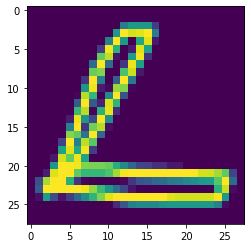

In [0]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_train))
plt.imshow(x_train[idx].reshape(28,28)) 
print(class_names[int(y_train[idx].item())])

In [0]:
# Reshape and normalize
image_size = 28
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1).astype('float32')
print(x_train.shape)#a
x_train /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(x_train.shape[1:])

(320000, 28, 28, 1)
(28, 28, 1)


In [0]:
# Define model
model = keras.Sequential()
model.add(layers.Convolution2D(16, (3, 3),
                        padding='same',
                        input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(100, activation='softmax')) 
# Train model
opt = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['top_k_categorical_accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)              

In [0]:
model.fit(x = x_train, y = y_train, validation_split=0.1, batch_size = 256, verbose=2, epochs=10)

Train on 288000 samples, validate on 32000 samples
Epoch 1/10
288000/288000 - 7s - loss: 1.9577 - top_k_categorical_accuracy: 0.7762 - val_loss: 1.3750 - val_top_k_categorical_accuracy: 0.8782
Epoch 2/10
288000/288000 - 6s - loss: 1.2561 - top_k_categorical_accuracy: 0.8919 - val_loss: 1.1454 - val_top_k_categorical_accuracy: 0.9054
Epoch 3/10
288000/288000 - 6s - loss: 1.0952 - top_k_categorical_accuracy: 0.9093 - val_loss: 1.0659 - val_top_k_categorical_accuracy: 0.9130
Epoch 4/10
288000/288000 - 6s - loss: 1.0051 - top_k_categorical_accuracy: 0.9185 - val_loss: 0.9941 - val_top_k_categorical_accuracy: 0.9209
Epoch 5/10
288000/288000 - 6s - loss: 0.9469 - top_k_categorical_accuracy: 0.9244 - val_loss: 0.9457 - val_top_k_categorical_accuracy: 0.9242
Epoch 6/10
288000/288000 - 6s - loss: 0.9033 - top_k_categorical_accuracy: 0.9289 - val_loss: 0.9427 - val_top_k_categorical_accuracy: 0.9241
Epoch 7/10
288000/288000 - 7s - loss: 0.8703 - top_k_categorical_accuracy: 0.9319 - val_loss: 0.8

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

Test accuarcy: 92.71%


(28, 28, 1)
['fan', 'flower', 'tennis_racquet', 'traffic_light', 'lollipop']


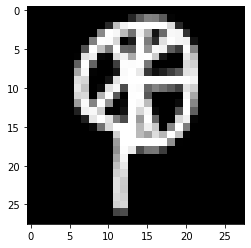

In [0]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_test))
img = x_test[idx]
print(img.shape)
plt.imshow(img.squeeze(),cmap='Greys_r') 
pred = model.predict(np.expand_dims(img, axis=0))[0]
ind = (-pred).argsort()[:5]
latex = [class_names[x] for x in ind]
print(latex)

In [0]:
with open('class_names.txt', 'w') as file_handler:
    for item in class_names:
        file_handler.write("{}\n".format(item))

In [0]:
model.save('keras.h5')

In [0]:
!mkdir model
!tensorflowjs_converter --input_format keras keras.h5 model/

In [0]:
!cp class_names.txt model/class_names.txt
!zip -r model.zip model

  adding: model/ (stored 0%)
  adding: model/group1-shard1of1.bin (deflated 7%)
  adding: model/model.json (deflated 85%)
  adding: model/class_names.txt (deflated 41%)


In [0]:
from google.colab import files
files.download('model.zip')

In [0]:
model = tf.keras.models.load_model('keras.h5')

['line', 'smiley_face', 'grapes', 'lightning', 'rifle']


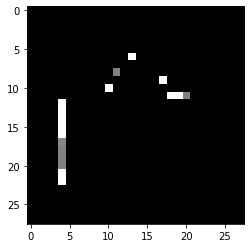

In [0]:
import tensorflow as tf
from PIL import Image, ImageOps
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img

#model = tf.keras.models.load_model('keras.h5')


img = load_img('b.png', target_size=(28,28))
img = ImageOps.invert(img)
plt.imshow(img) 
img_tensor = img_to_array(img)
#print(img_tensor.shape)
plt.imshow(img_tensor/255)
#plt.imshow(img) 

img_tensor = cv2.cvtColor(img_tensor, cv2.COLOR_BGR2GRAY)## Convert  channel to 1
img_tensor = np.expand_dims(img_tensor, axis=2) # add last channel as 1  (28,28) to (28,28,1)
img_tensor = np.expand_dims(img_tensor, axis=0) #add 1 more channel at start for batch (1,28,28,1)
img_tensor /= 255. 

#print(img_tensor.shape)
#pred = model.predict(img_tensor)


pred = model.predict(img_tensor)[0]
ind = (-pred).argsort()[:5]
latex = [class_names[x] for x in ind]
print(latex)
